In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from datetime import timedelta, date, time,datetime
from shapely.geometry import Polygon,LineString
from math import sqrt
from IPython.display import HTML
from numpy.linalg import norm 
from matplotlib.animation import FuncAnimation
from matplotlib.widgets import Slider, Button, RadioButtons
from utils import parse_log
import glob
import os
#sns.set_style("whitegrid")
%matplotlib inline

In [2]:
df = pd.read_csv("logs/base.csv",index_col = 0)
df.index = pd.to_datetime(df.index)
locations = [loc for loc in df.columns if ">" not in loc]
transit_locs = [loc for loc in df.columns if ">" in loc ]

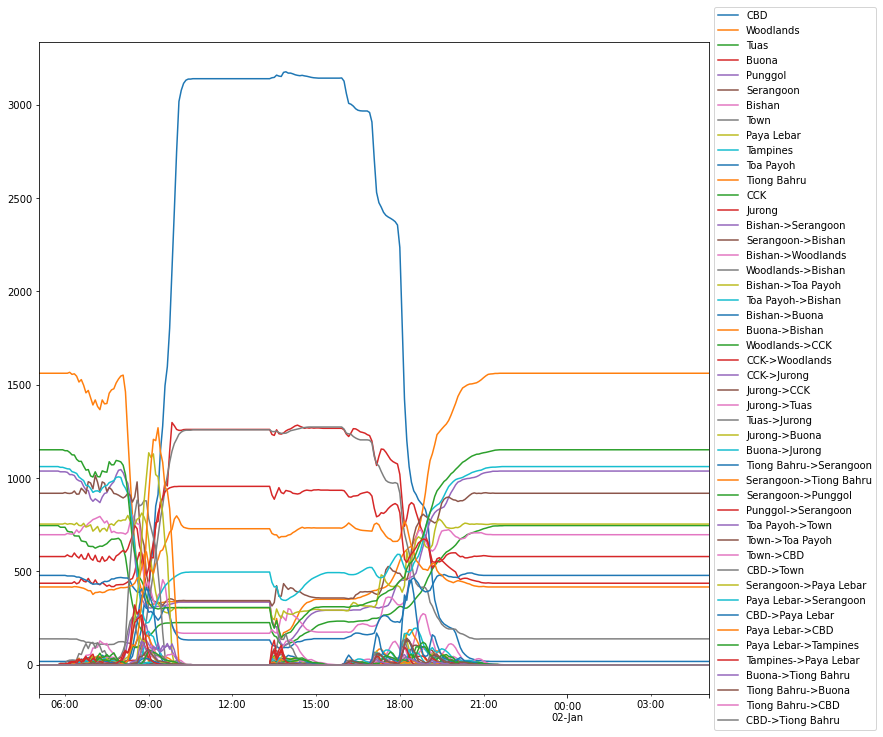

In [3]:
d1 = df.index[0] + timedelta(days=1)
df[:d1].plot(figsize=(12,12))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

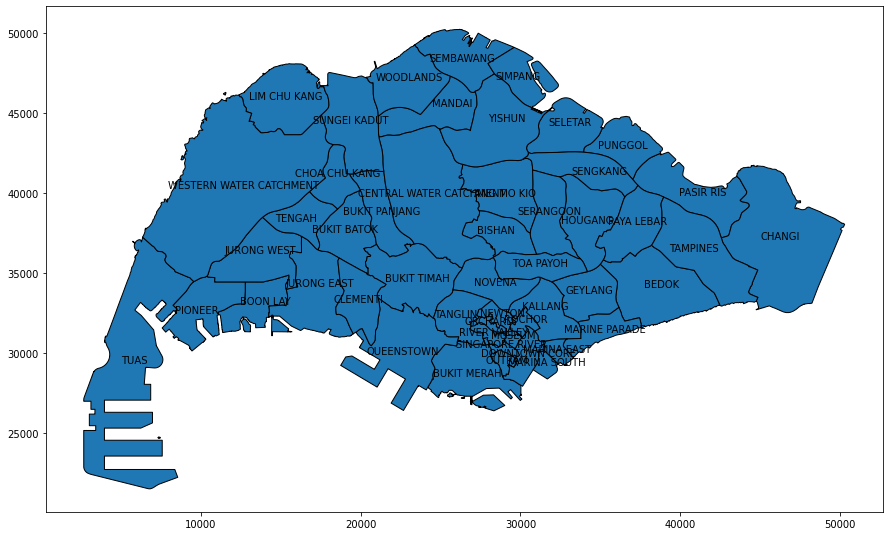

In [4]:
region_shp = "assets/plan-shp/MP14_PLNG_AREA_NO_SEA_PL.shp"
region_map = gpd.read_file(region_shp)

region_map["coords"] = region_map["geometry"].apply(lambda x:x.representative_point().coords[0])
to_remove = [17,40,44,46,48]
# region_map.drop(to_remove,inplace = True)

fig,ax = plt.subplots(figsize = (15,15))
for _,row in region_map.drop(to_remove).iterrows():
    plt.annotate(s=row["PLN_AREA_N"],xy = row["coords"],horizontalalignment = "center")
region_map.drop(to_remove).plot(ax = ax,edgecolor = 'black')
my_map = region_map.copy()

In [5]:
#Insert all change to my_map here
df = pd.read_csv("data/locations_data.csv")
my_map = region_map.copy()
to_remove = [17,40,44,46,48]
water_regions = [27,49]
water_regions = my_map.iloc[water_regions]
my_map.drop(to_remove,inplace = True)
loc_map = ["Bishan","Paya Lebar","Bishan","Jurong","CCK","CBD","CCK","Buona","Paya Lebar","Town","Toa Payoh","Tampines","Serangoon","Jurong","CCK","Woodlands",
"Paya Lebar","Tuas","Jurong","Paya Lebar","Punggol","Tiong Bahru","Punggol","Woodlands","Punggol","Serangoon","Bishan","Tampines","Woodlands","Tampines","CBD",
"Town","CCK","Toa Payoh","Paya Lebar","Woodlands","CBD","CBD","Town","CCK","Buona","CBD","Woodlands","Tuas","CCK","Woodlands","Town","CBD","Town","Town"]
my_map["location"] = loc_map
my_map2 = my_map.dissolve(by="location").reset_index()
# my_map2 = my_map2.merge(df,on = "location")
my_map2["coords"] = my_map2["geometry"].apply(lambda x:(x.representative_point().x,x.representative_point().y))

No handles with labels found to put in legend.


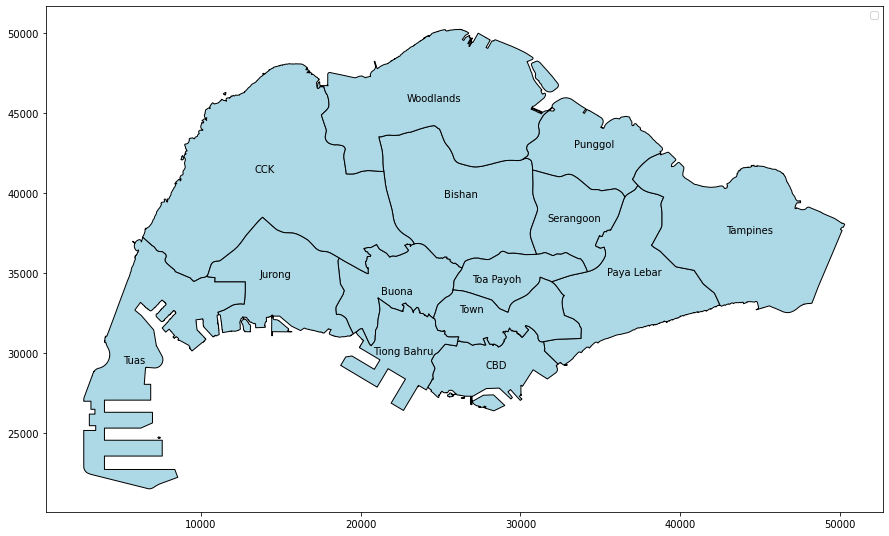

In [6]:
fig,ax = plt.subplots(figsize = (15,15))
my_map2.plot(ax = ax,color = "lightblue",edgecolor = 'black',legend = True)
for idx,row in my_map2.iterrows():
     plt.annotate(s=row["location"],xy = row["coords"],horizontalalignment = "center")
plt.legend()
#water_regions.plot(ax = ax,color = 'blue', edgecolor = 'blue')
#gpd.GeoDataFrame(my_map.loc[45]).T.plot(ax = ax,color = 'green')

In [7]:
map_df = my_map2.merge(df,on = "location")
map_df["total_home"] = map_df["people_home"] + map_df["student_home"]

Text(0.5, 1.0, 'Distribution of Homes around Singapore')

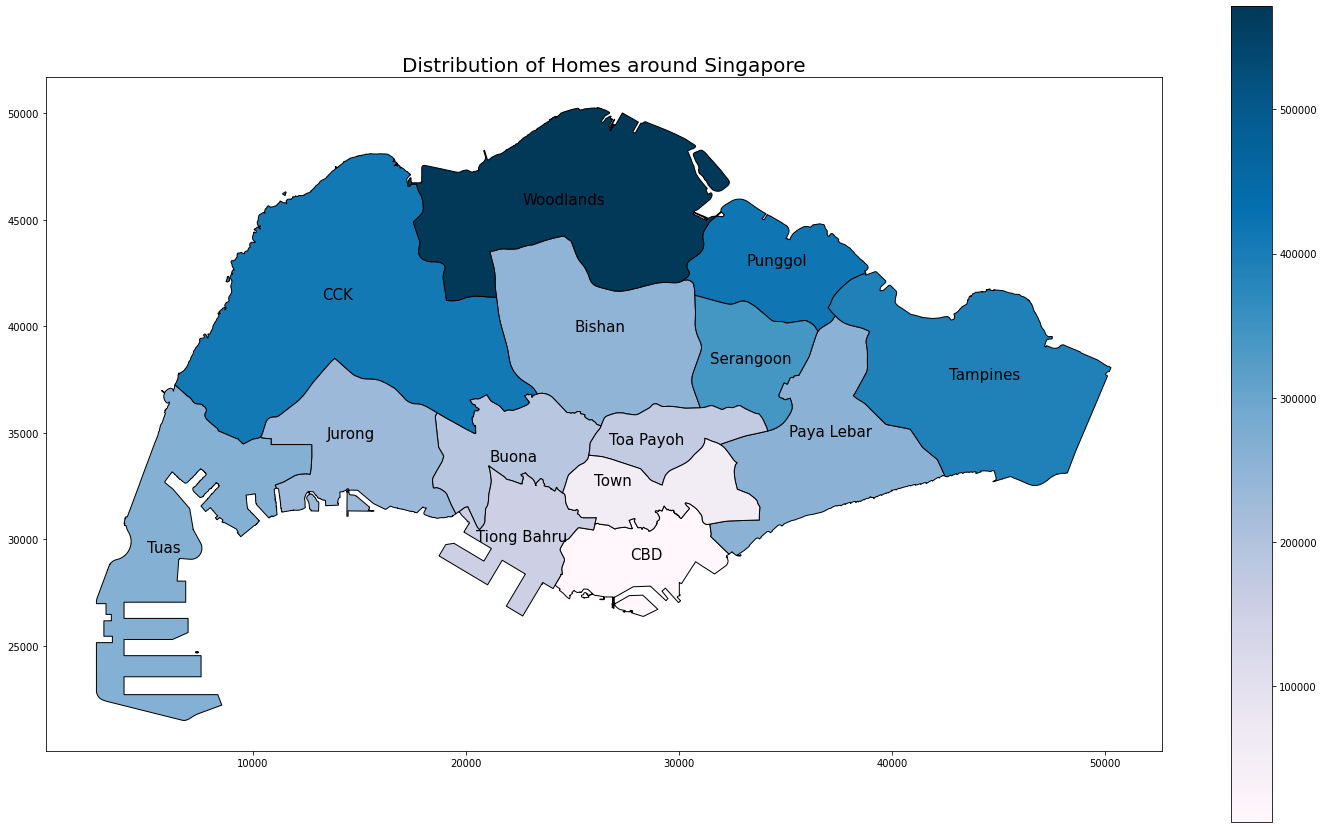

In [8]:
hi = map_df.plot(edgecolor = 'black',legend = True,column = "total_home",cmap = "PuBu",figsize = (25,15))
for idx,row in map_df.iterrows():
     plt.annotate(s=row["location"],xy = row["coords"],horizontalalignment = "center",size = 15)
plt.title("Distribution of Homes around Singapore",size = 20)



Text(0.5, 1.0, 'Distribution of Homes around Singapore')

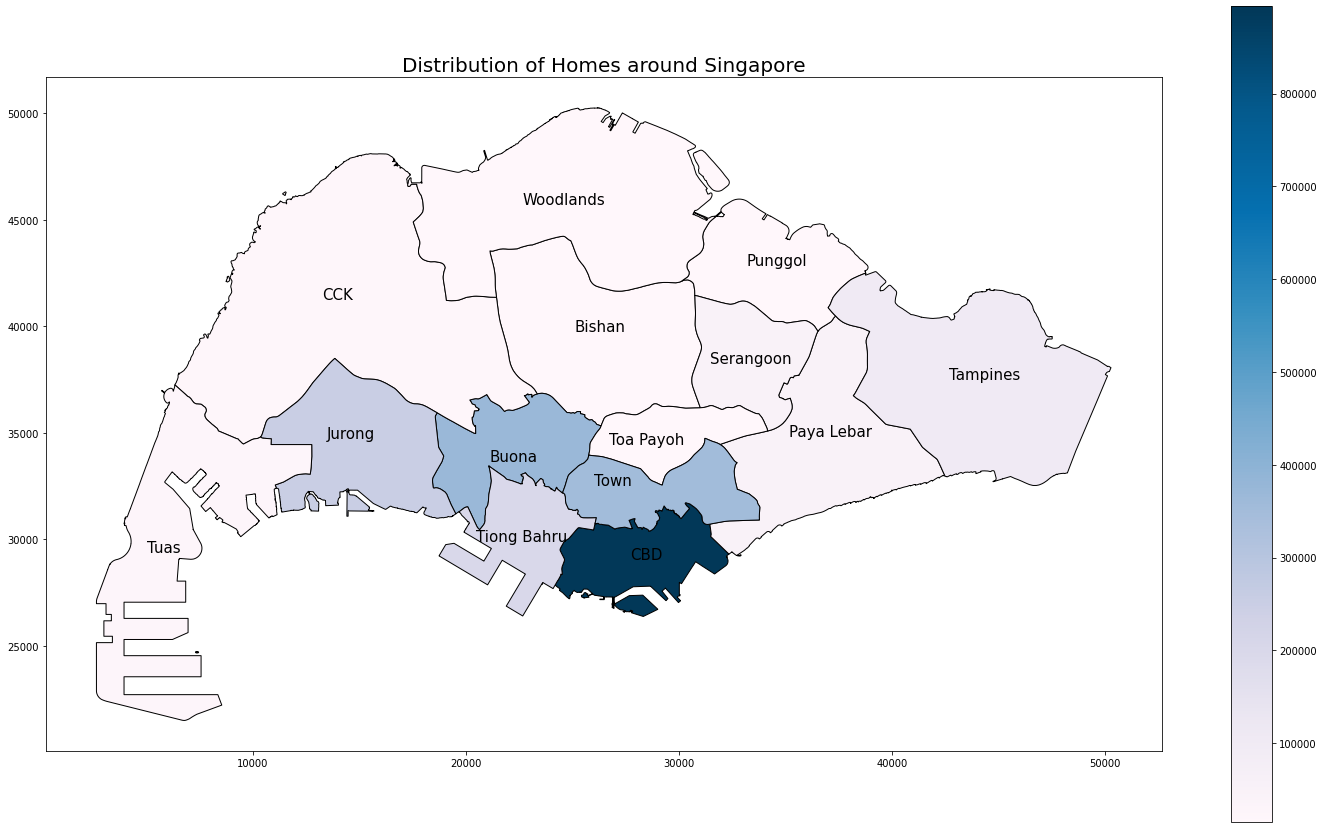

In [9]:
map_df.plot(edgecolor = 'black',legend = True,column = "people_work",cmap = "PuBu",figsize = (25,15))
for idx,row in map_df.iterrows():
     plt.annotate(s=row["location"],xy = row["coords"],horizontalalignment = "center",size = 15)
plt.title("Distribution of Homes around Singapore",size = 20)

In [10]:
pd.set_option('mode.chained_assignment', None)
map_df = my_map2.merge(df,on = "location")
map_df["total_home"] = map_df["people_home"] + map_df["student_home"]
map_df = map_df[["location","geometry","total_home","coords"]]

map_df["text_coords"] = map_df["coords"]
map_df["text_coords"] = map_df["text_coords"].apply(lambda x: np.array(x))
#map_df["coords"] = map_df["coords"].apply(lambda x: np.array(x))
# Adjusting Coordinates of the Text for Visualisation
map_df["text_coords"][0] = map_df["text_coords"][0] + np.array([-2000,0])
map_df["text_coords"][1] = map_df["text_coords"][1] + np.array([0,1500])
map_df["text_coords"][2] = map_df["text_coords"][2] + np.array([-500,0])
map_df["text_coords"][3] = map_df["text_coords"][3] + np.array([0,1000])
map_df["text_coords"][4] = map_df["text_coords"][4] + np.array([500,-1000])
map_df["text_coords"][5] = map_df["text_coords"][5] + np.array([0,-2000]) #Paya Lebar
map_df["text_coords"][6] = map_df["text_coords"][6] + np.array([0,100])
#map_df["text_coords"][7] = map_df["text_coords"][7] + np.array([0,-1000]) #Serangoon
map_df["text_coords"][8] = map_df["text_coords"][8] + np.array([0,-1000])
map_df["text_coords"][9] = map_df["text_coords"][9] + np.array([0,-100]) #Tiong Bahru
map_df["text_coords"][10] = map_df["text_coords"][10] + np.array([3500,750]) #Toa Payoh
map_df["text_coords"][11] = map_df["text_coords"][11] + np.array([3750,0]) #Town
map_df["text_coords"][12] = map_df["text_coords"][12] + np.array([1000,4300]) #Tuas
map_df["text_coords"][13] = map_df["text_coords"][13] + np.array([0,400]) #Woodlands

# Adjusting Coordinates of the Transport Center 
#map_df["coords"][9] = map_df["coords"][9] + np.array([0,1000])
map_df["coords"][11] = map_df["coords"][11] + np.array([750,0])
map_df["coords"][12] = np.array([9000,34000])

map_df["coords"] = map_df["coords"].apply(lambda x: tuple(x))
pd.set_option('mode.chained_assignment', 'raise')

In [11]:
data_df = pd.read_csv("logs/base.csv",index_col = 0)
data_df.index = pd.to_datetime(data_df.index)
locations = [loc for loc in data_df.columns if ">" not in loc]
transit_locs = [loc for loc in data_df.columns if ">" in loc ]
loc_data = data_df[locations].T
loc_data.reset_index(inplace = True)
loc_data.columns = ["location"] + list(loc_data.columns[1:])
trans_data = data_df[transit_locs].T
trans_data.reset_index(inplace = True)
trans_data.columns = ["location"] + list(trans_data.columns[1:])

In [12]:
width = 300
geoms = []
for i,v in enumerate(transit_locs):
    loc1,loc2 = v.split("->")
    c1 = np.array(map_df[map_df["location"] == loc1]["coords"].iloc[0])
    c2 = np.array(map_df[map_df["location"] == loc2]["coords"].iloc[0])
    #Vector from 1 to 2 
    v = c2 - c1
    n1 = np.array((-v[1],v[0]))
    n1 = n1/norm(n1)*width
    if i%2:
        coords = [c1+n1,c1,c2,c2+n1]
        poly = Polygon(coords)
    else:
        coords = [c1+(1.5*n1),c1+(2.5*n1),c2+(2.5*n1),c2+(1.5*n1)]
        poly = Polygon(coords)
    geoms.append(poly)
trans_df = pd.DataFrame({"location":transit_locs,"geometry":geoms})
trans_df = gpd.GeoDataFrame(trans_df)

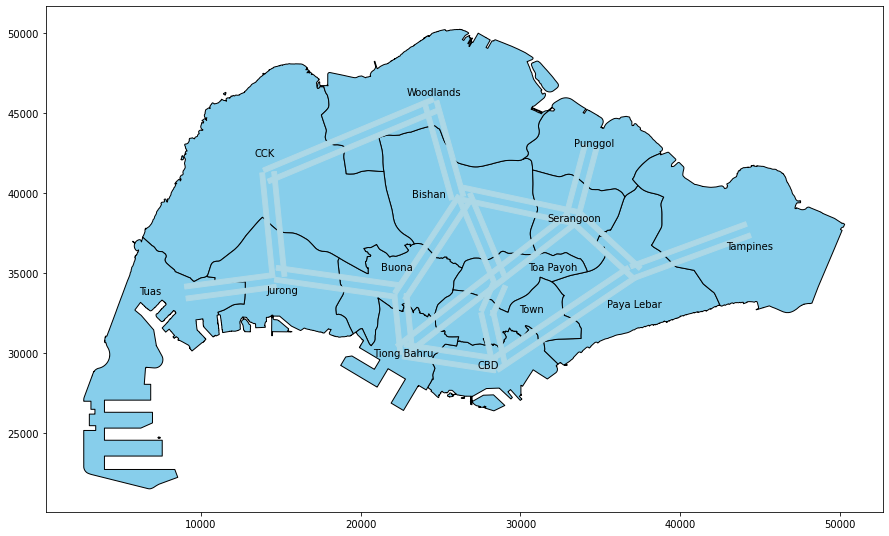

In [13]:
fig,ax = plt.subplots(figsize = (15,15))
map_df.plot(ax = ax,color = "skyblue",edgecolor = 'black',legend = True)
for idx,row in map_df.iterrows():
     plt.annotate(s=row["location"],xy = row["text_coords"],horizontalalignment = "center")
trans_df.plot(ax = ax,edgecolor = "lightblue",color = "lightblue")

In [14]:
trans_df = trans_df.merge(trans_data,on = "location")
trans_df.columns = [str(i) for i in trans_df.columns]
map_df = map_df.merge(loc_data,on = "location")
map_df.columns = [str(i) for i in map_df.columns]


In [15]:
start_time = 5
end_time = 5+227
map_day = map_df.iloc[:,:end_time].copy()
trans_day = trans_df.iloc[:,:end_time-3].copy()
map_day.columns = list(map_day.columns[:5]) + [i[11:] for i in map_day.columns[start_time:end_time]]
trans_day.columns = list(trans_day.columns[:2]) + [i[11:] for i in trans_day.columns[2:end_time]]
timings = map_day.columns[5:end_time]

In [16]:
def create_plot(time):
    fig,ax = plt.subplots(figsize=(15,10))
    hi = map_day.plot(ax = ax, edgecolor = 'black',legend = True,column = time,cmap = "PuBu",vmin = -200,vmax = 2000,
                     legend_kwds={'shrink': 0.7})
    hi2 = trans_day.plot(ax = ax, legend = True,column = time,cmap = "Reds",vmin = -100,vmax = 700,
                        legend_kwds={'shrink': 0.7})

In [17]:
from ipywidgets import interact,HTML,SelectionSlider,interactive

slider = SelectionSlider(options = timings,continuous_update = False)
slider_plot = interactive(create_plot,time = slider)
display(slider_plot)

interactive(children=(SelectionSlider(continuous_update=False, description='time', options=('05:05:00', '05:10…

In [18]:
df = pd.read_csv("logs/base.csv",index_col = 0)
df.head()

,CBD,Woodlands,Tuas,Buona,Punggol,Serangoon,Bishan,Town,Paya Lebar,Tampines,...,Serangoon->Paya Lebar,Paya Lebar->Serangoon,CBD->Paya Lebar,Paya Lebar->CBD,Paya Lebar->Tampines,Tampines->Paya Lebar,Buona->Tiong Bahru,Tiong Bahru->Buona,Tiong Bahru->CBD,CBD->Tiong Bahru
2020-01-01 05:05:00,18,1562,746,437,1038,919,697,139,754,1062,...,0,0,0,0,0,0,0,0,0,0
2020-01-01 05:10:00,18,1562,746,437,1038,919,697,139,754,1062,...,0,0,0,0,0,0,0,0,0,0
2020-01-01 05:15:00,18,1562,746,437,1038,919,697,139,754,1062,...,0,0,0,0,0,0,0,0,0,0
2020-01-01 05:20:00,18,1562,746,437,1038,919,697,139,754,1062,...,0,0,0,0,0,0,0,0,0,0
2020-01-01 05:25:00,18,1562,746,437,1038,919,697,139,754,1062,...,0,0,0,0,0,0,0,0,0,0


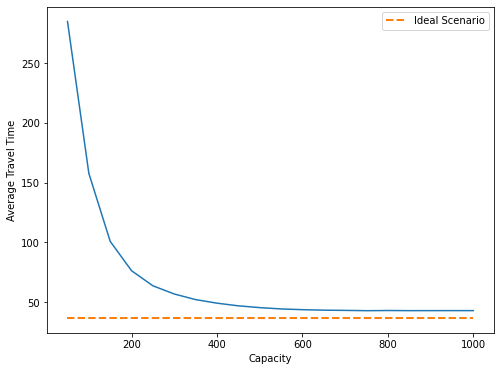

In [20]:
time_df = pd.read_csv("data/travel_time.csv")
fig, ax = plt.subplots(figsize = (8,6))

sns.lineplot(data = time_df, x = "Capacity",y="Average Travel Time",ax = ax)
x = np.linspace(50, 1000)
ideal = np.ones(len(x))*36.79
line1, = ax.plot(x, ideal, '--', linewidth=2,
                 label='Ideal Scenario')
plt.legend()

In [21]:

#df.index = pd.to_datetime(df.index)


Text(0.5, 1.0, 'Baseline')

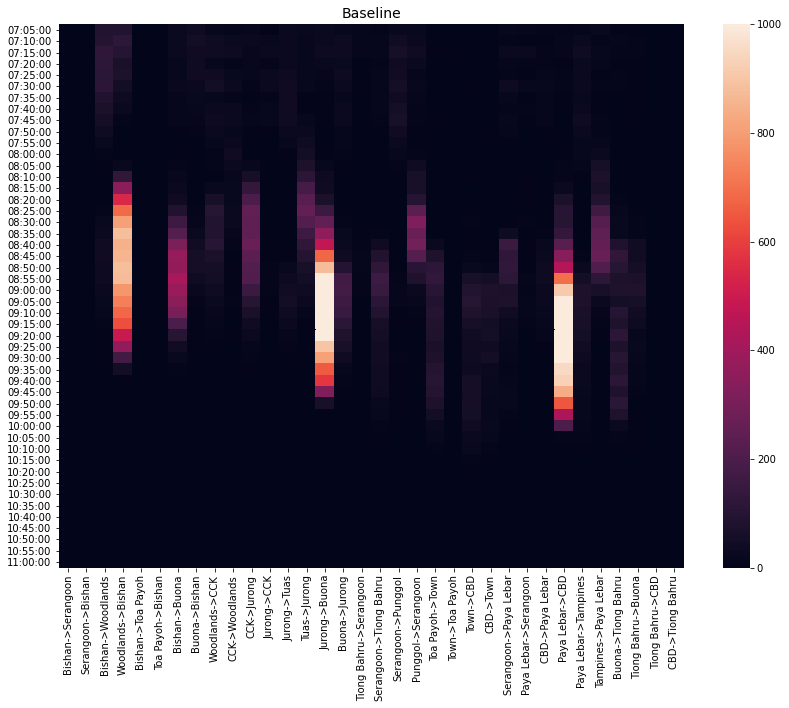

In [52]:
fig_folder = "../data_collection/"


df = pd.read_csv("logs/base.csv",index_col = 0)
trans_locs = [i for i in df.columns if "->" in i]
df = df[trans_locs].copy()
start,end = 24,24+(4*12)
df = df.iloc[start:end]
fig,ax = plt.subplots(figsize = (14,10))
hi = sns.heatmap(df,yticklabels = [i[-8:] for i in df.index],vmin = 0,vmax = 1000)
plt.title("Baseline",fontsize = 14)

In [53]:
def save_heatmap(path):
    
    df = pd.read_csv(path,index_col = 0)
    pt = path.split(".")
    pt = pt[0].split("/")
    name = pt[2][5:]
    trans_locs = [i for i in df.columns if "->" in i]
    df = df[trans_locs].copy()
    start,end = 24,24+(4*12)
    df = df.iloc[start:end]
    fig,ax = plt.subplots(figsize = (14,10))
    hi = sns.heatmap(df,yticklabels = [i[-8:] for i in df.index],vmin = 0,vmax = 1000)
    plt.title(f"Delay at {name}",fontsize = 14)
    print(fig_folder + name + ".png")
    plt.savefig(fig_folder + name + ".png")

../data_collection/Bishan.png
../data_collection/Buona.png
../data_collection/CBD.png
../data_collection/CCK.png
../data_collection/Jurong.png
../data_collection/Paya Lebar.png
../data_collection/Punggol.png
../data_collection/Serangoon.png
../data_collection/Tampines.png
../data_collection/Tiong Bahru.png
../data_collection/Toa Payoh.png
../data_collection/Town.png
../data_collection/Tuas.png
../data_collection/Woodlands.png


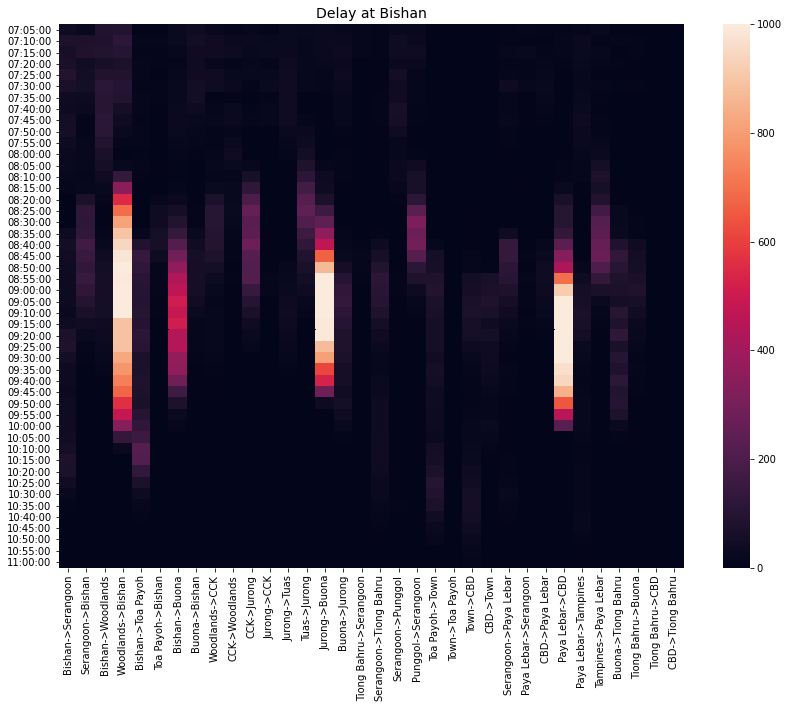

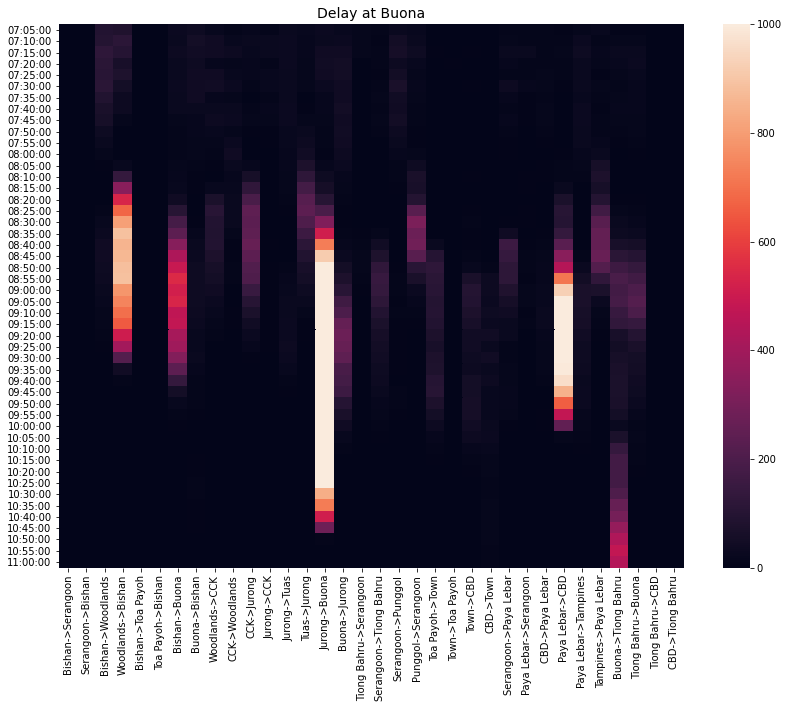

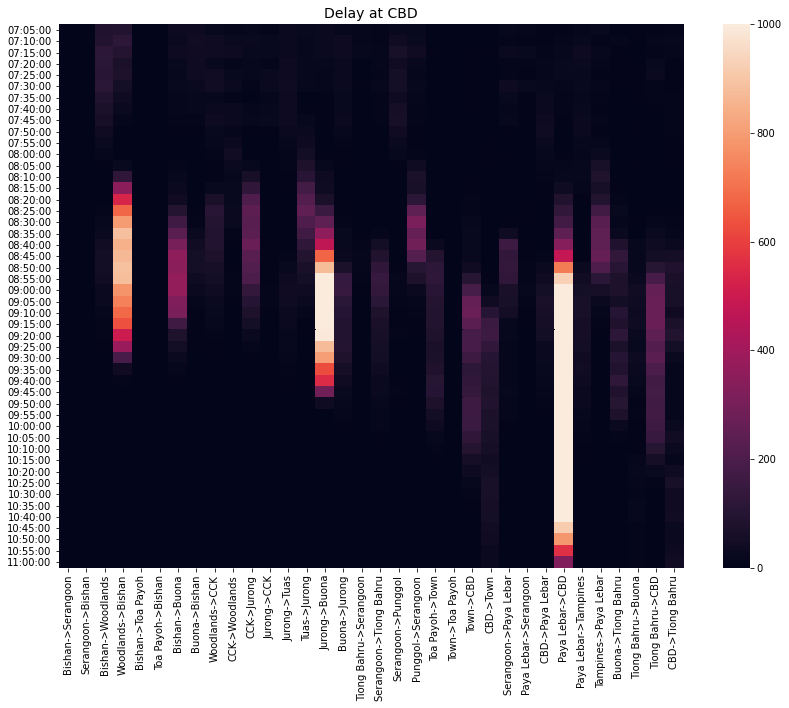

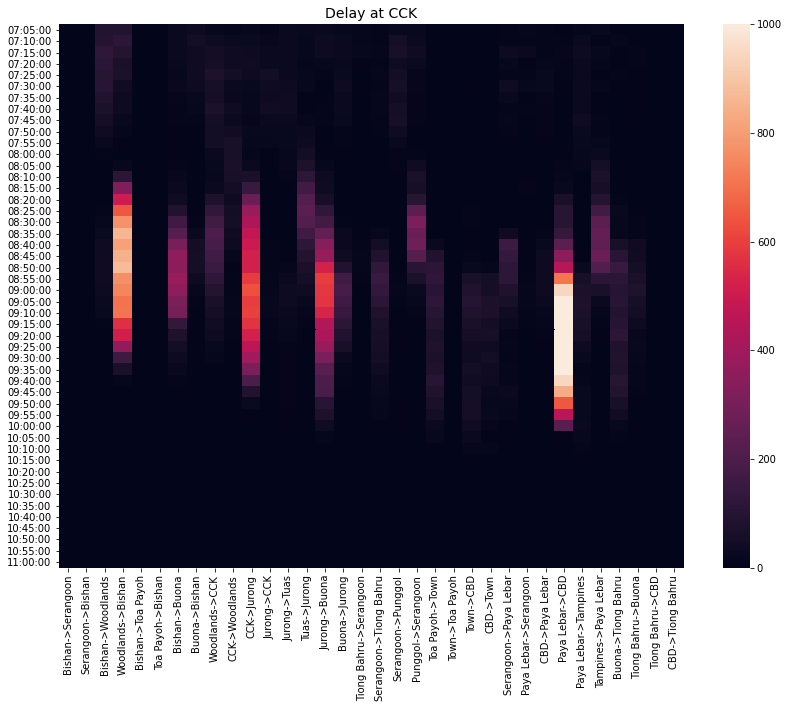

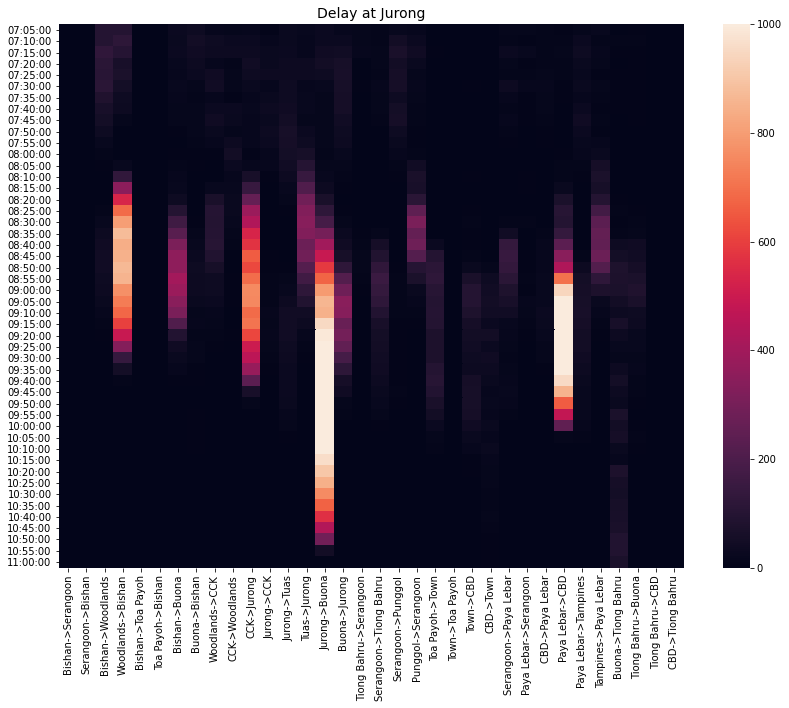

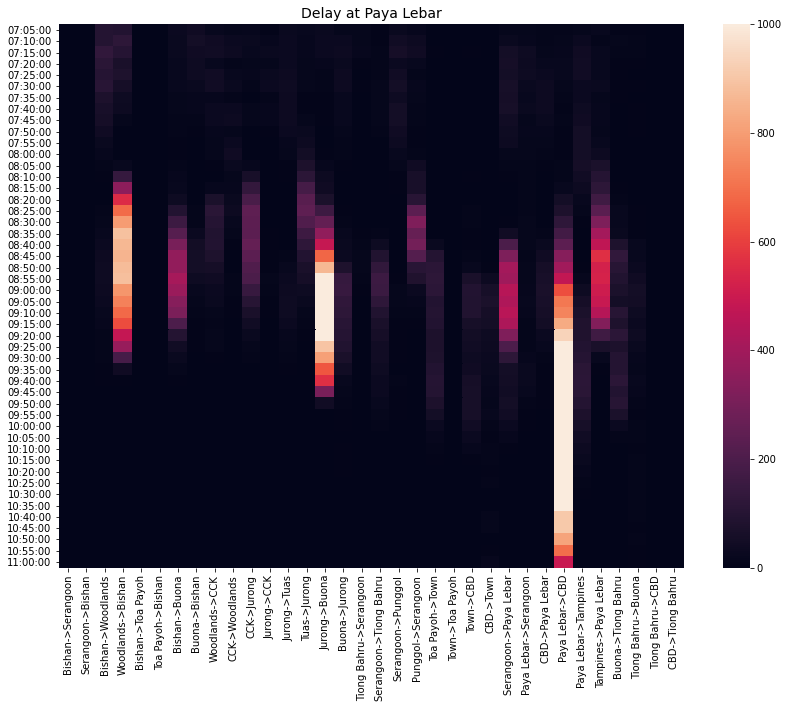

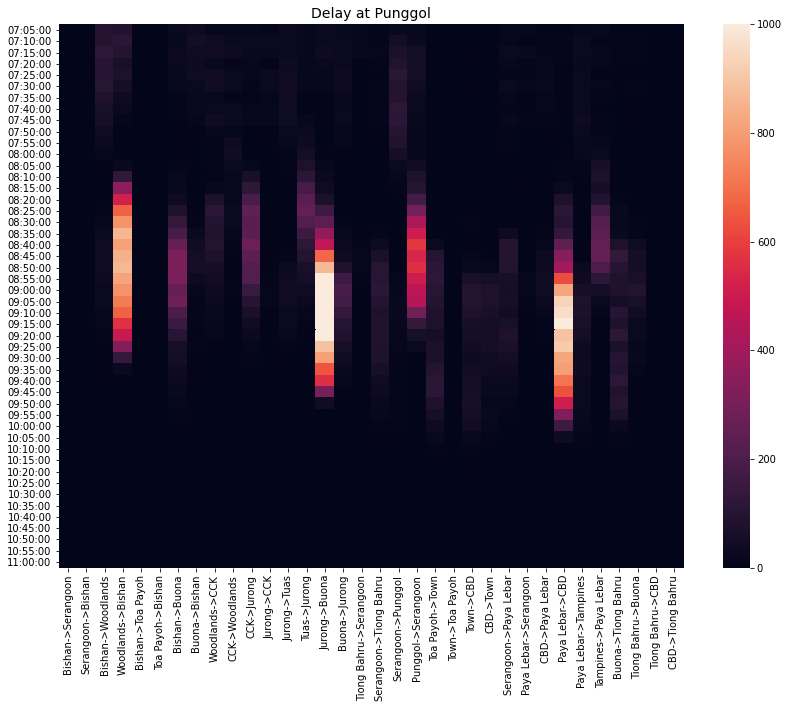

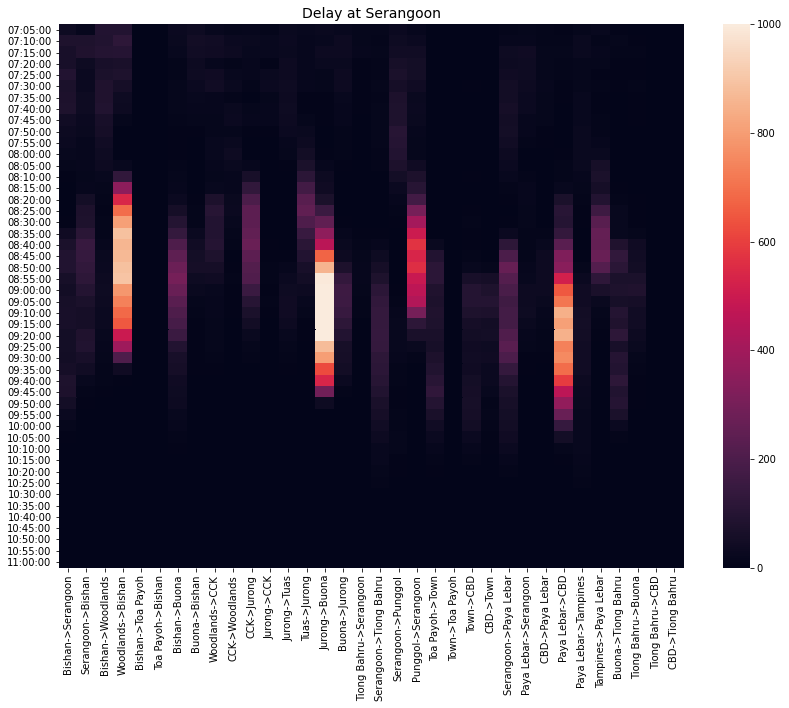

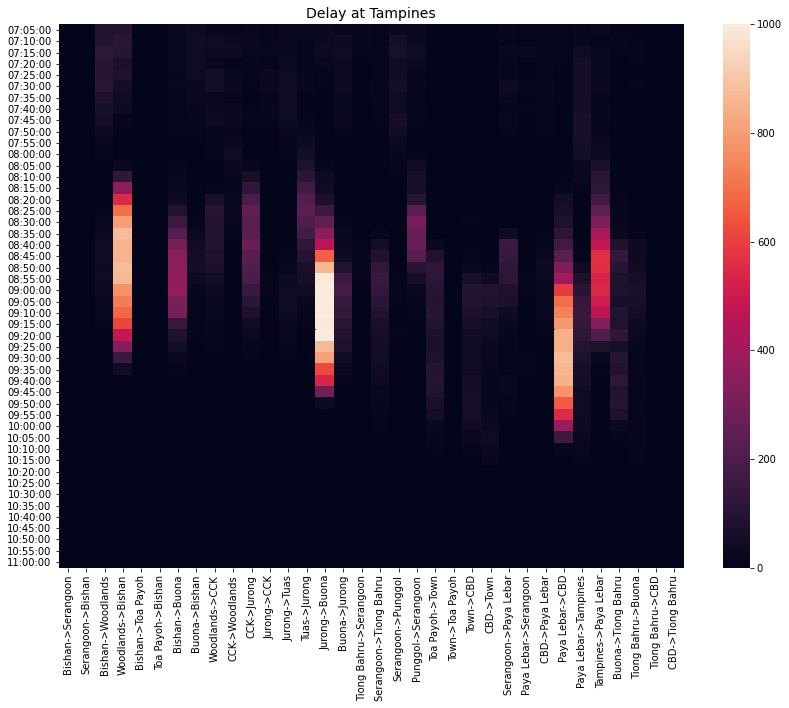

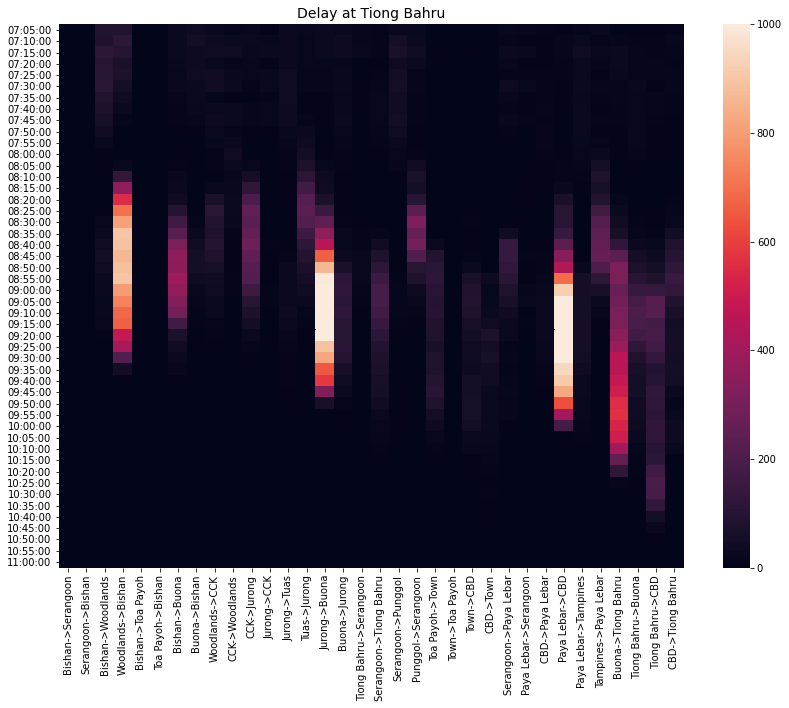

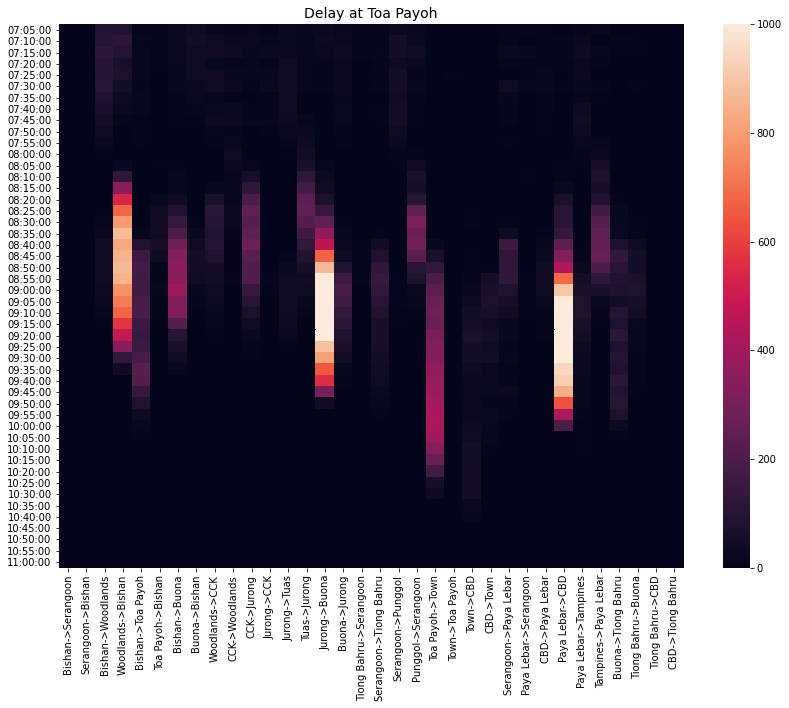

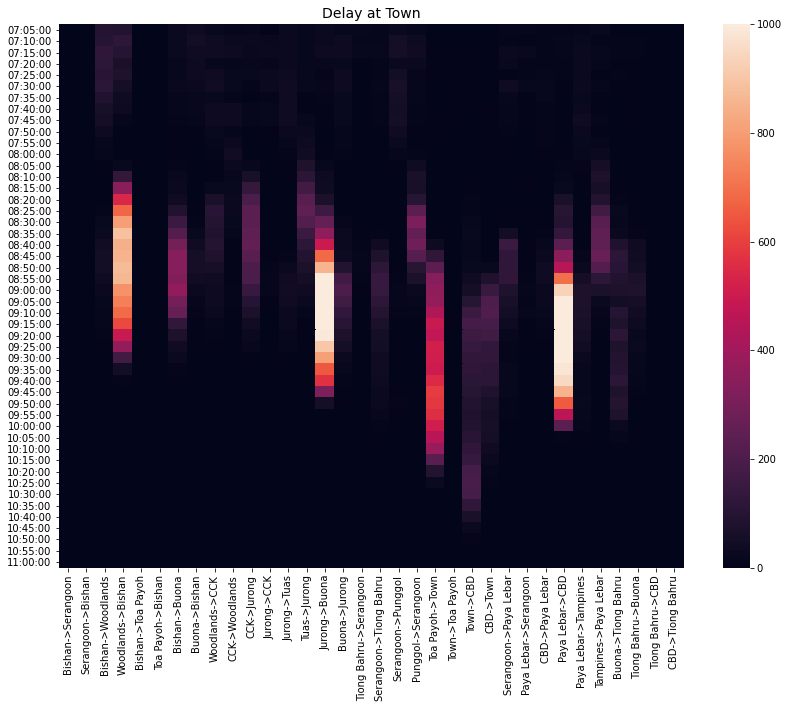

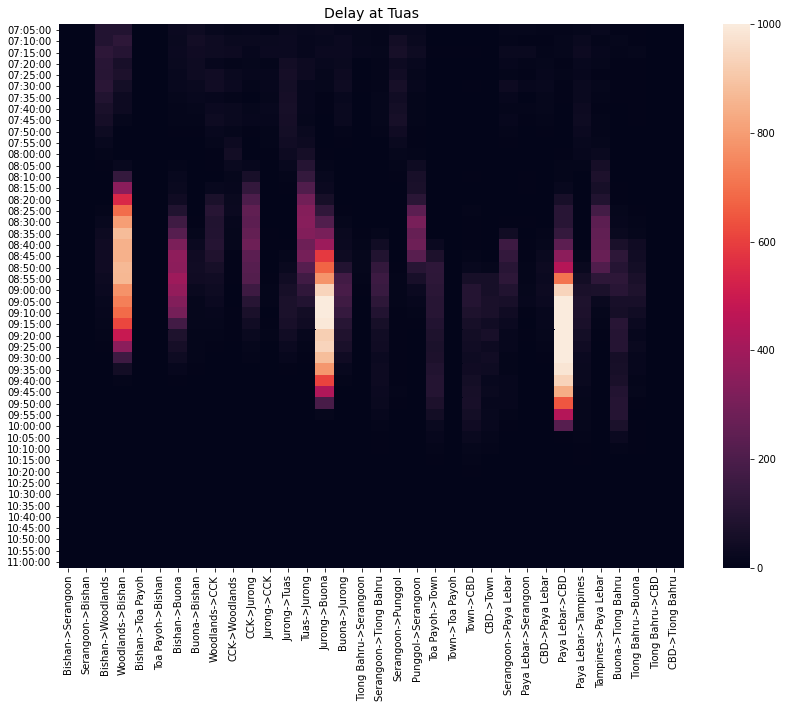

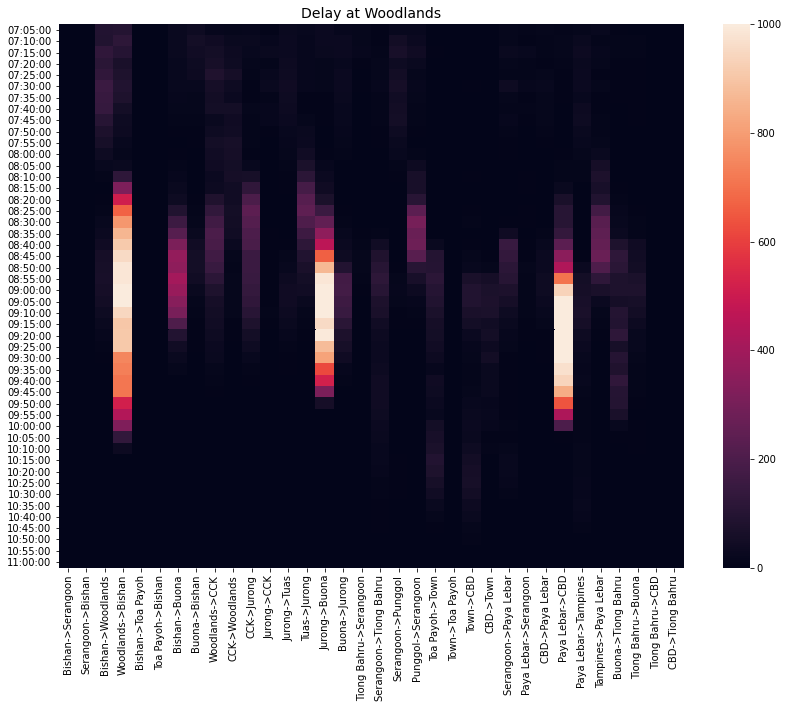

In [54]:
for f in os.listdir("logs/node_delay"):
    if f[-4:] == ".csv":
        save_heatmap("logs/node_delay/"+f)
    

In [107]:
df.index[2::6]

Index(['2020-01-01 07:15:00', '2020-01-01 07:45:00', '2020-01-01 08:15:00',
       '2020-01-01 08:45:00', '2020-01-01 09:15:00', '2020-01-01 09:45:00',
       '2020-01-01 10:15:00', '2020-01-01 10:45:00'],
      dtype='object')

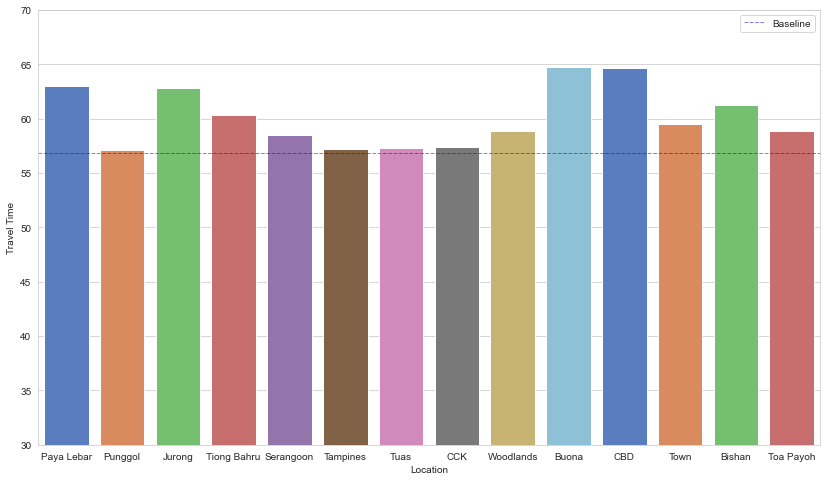

In [97]:
delay_df = pd.read_csv("data/delay_time.csv")
baseline = delay_df.iloc[0,1]
sns.set_style("whitegrid")
sns.set_palette("muted")
fig, ax = plt.subplots(figsize = (14,8))

sns.barplot(data = delay_df.iloc[1:], x = "Location",y="Travel Time",ax = ax,palette = "muted")
plt.axhline(y=baseline,linewidth=1, color='blue',ls = "--",alpha = 0.5,label = "Baseline")
ax.set_ylim(30,70)
x = np.linspace(50, 1000)
plt.legend()


In [84]:
delay_df.iloc[0,1]

56.85

In [81]:
df = pd.read_csv("logs/base.csv",index_col = 0)
df = df.iloc[:19*12]
df.index = pd.to_datetime(df.index)
#df["combined"] = df[transit_locs].sum(axis = 1)
test = df.resample("30min").sum()//6
test["combined"] = test[transit_locs].sum()

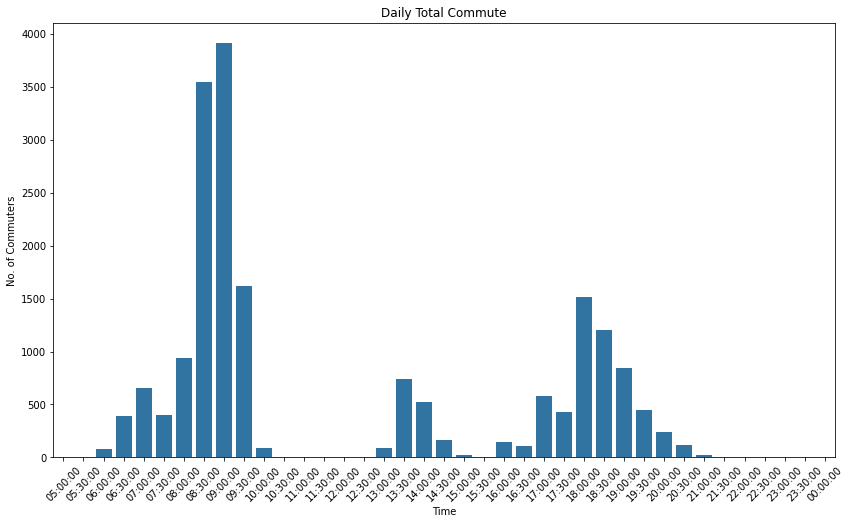

In [89]:
t_index = [str(i) for i in test.index.time]
fig,ax = plt.subplots(figsize = (14,8))
sns.barplot(data = test.reset_index(),y = "combined",x="index",ax = ax,color = "tab:blue")
ax.set_xticklabels(t_index,rotation = 45)
ax.set_ylabel("No. of Commuters")
ax.set_xlabel("Time")
plt.title("Daily Total Commute")
plt.savefig("../data_collection/ridership.png")

In [87]:
test["combined"] = test[transit_locs].sum(axis = 1)

In [71]:
test.to_csv("test.csv")

In [88]:
test

,CBD,Woodlands,Tuas,Buona,Punggol,Serangoon,Bishan,Town,Paya Lebar,Tampines,...,Paya Lebar->Serangoon,CBD->Paya Lebar,Paya Lebar->CBD,Paya Lebar->Tampines,Tampines->Paya Lebar,Buona->Tiong Bahru,Tiong Bahru->Buona,Tiong Bahru->CBD,CBD->Tiong Bahru,combined
2020-01-01 05:00:00,15,1301,621,364,865,765,580,115,628,885,...,0,0,0,0,0,0,0,0,0,0
2020-01-01 05:30:00,18,1562,743,437,1036,919,697,139,754,1060,...,0,0,0,0,1,0,0,0,0,5
2020-01-01 06:00:00,20,1558,709,437,1018,920,704,138,755,1040,...,1,0,4,0,10,1,0,0,0,82
2020-01-01 06:30:00,30,1483,657,449,947,944,739,125,746,975,...,11,4,8,1,25,3,4,0,0,395
2020-01-01 07:00:00,39,1396,633,437,888,969,780,112,726,936,...,15,11,11,24,17,7,7,0,0,660
2020-01-01 07:30:00,29,1474,668,423,979,926,726,112,750,986,...,6,11,3,26,9,2,4,0,0,400
2020-01-01 08:00:00,25,1265,513,443,946,899,731,118,774,908,...,3,0,38,7,80,5,2,0,0,935
2020-01-01 08:30:00,199,450,205,519,406,744,625,136,779,383,...,6,21,324,14,220,73,39,0,0,3547
2020-01-01 09:00:00,749,327,185,660,309,355,376,549,451,302,...,8,18,1135,63,20,84,43,0,0,3911
2020-01-01 09:30:00,1785,337,223,1091,322,342,311,1037,288,440,...,0,1,813,22,0,97,10,0,0,1616
